In [103]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [104]:
# Define text cleaning function
def clean_text(text):
    text = re.sub('<br />', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove HTML tags
    expanded_text = contractions.fix(text)  # Expand contractions
    tokens = word_tokenize(expanded_text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in custom_stopwords]
    return ' '.join(tokens)

In [105]:
df = pd.read_csv("data/IMDB.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [106]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\warne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
list_stopwords = {
    'even', 'well', 'see', 'way', 'look', 'end', 'first', 'find', 'show', 
    'come', 'watch', 'take', 'give', 'make', 'still', 'yet', 'actually', 
    'scene', 'plot', 'character', 'director', 'actor', 'role', 'play', 
    'film', 'movie', 'thing', 'something', 'nothing', 'kind', 'lot', 
    'part', 'right', 'almost', 'one', 'time', 'story', 'think', 'people', 
    'life', 'made', 'two', 'point', 'u', 'man', 'woman', 'another', 'go', 
    'though', 'work', 'girl', 'watching', 'seen', 'know', 'someone', 'guy', 
    'got', 'probably', 'kid', 'rather', 'world', 'going', 'moment', 'scene'
    'movie','say','many','played','performance','thought', 'done','set',
    'must','need','maybe',' film',' scene','much','little',' movie',' character'
    ,'performance', 'actor','acting','fact','anything','saw','must','really'
    
    
}

custom_stopwords = set(stopwords.words('english')).union(list_stopwords)
lemmatizer = WordNetLemmatizer()

In [108]:
# Apply the clean_text function to the 'review' column and store the result in a new column 'cleaned_reviews'
df['cleaned_reviews'] = df['review'].apply(clean_text)

# Drop the original 'review' column if needed
df = df.drop('review', axis=1)

In [109]:
# Export the DataFrame to a CSV file
df.to_csv('data/clean_IMDB.csv', index=False) 

In [110]:
df.head()

,sentiment,cleaned_reviews
0,positive,reviewer mentioned oz episode hooked exactly h...
1,positive,wonderful production filming technique unassum...
2,positive,wonderful spend hot summer weekend sitting air...
3,negative,basically family boy jake think zombie closet ...
4,positive,petter mattei love money visually stunning mr ...


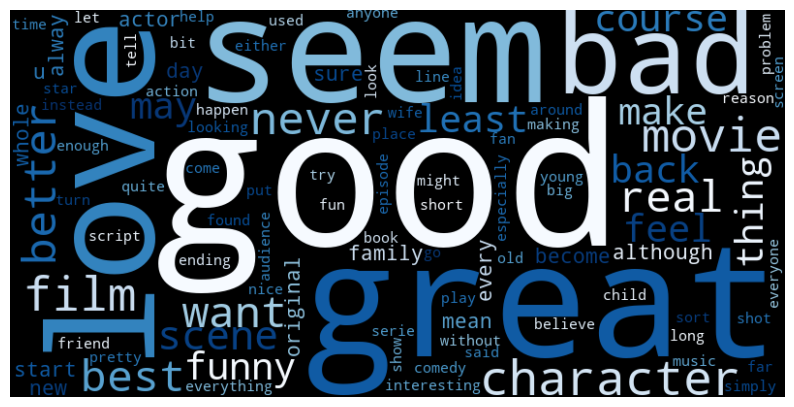

In [111]:
from wordcloud import WordCloud

# Join all reviews into a single string
all_text = ' '.join(df['cleaned_reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues', max_words=100).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("results/MovieWordCloud.png")
plt.show()
